In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("fatal-police-shootings-data.csv")

In [94]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### Races with signs of mental illness stats

In [95]:
df2 = df.pivot_table(index='race', columns='signs_of_mental_illness', aggfunc = 'count', values='id')
df2

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


### Race with highest mental illness rate

In [96]:
df2['pct_of_illness'] = df2.apply(lambda x: x[True] / np.sum(x), axis=1)
df2[df2['pct_of_illness'] == df2['pct_of_illness'].max()]

signs_of_mental_illness,False,True,pct_of_illness
race,,,
W,1763,713,0.287964


### Crimes per weekday

In [97]:
df['date'] = pd.to_datetime(df['date'])
df['day_id'] = df['date'].dt.day_of_week

In [98]:
df.set_index('day_id').sort_index(inplace=True)
crimes = df['day_id'].value_counts()
crimes.sort_index(inplace=True)
crimes.rename(index={0:'Monday', 1:'Tuesday', 2:'Wednesday',3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)
crimes

Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: day_id, dtype: int64

### Graphical representation of crimes per weekday

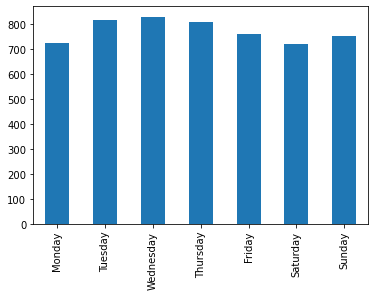

In [99]:
crimes.plot.bar()
plt.show()

#### States with abbreviations

In [100]:
data_1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations')
states = data_1[0]
states.set_axis(range(1,11), axis=1, inplace=True)
states = states[[1, 6]]
states_cleaned = states.dropna().drop_duplicates()
states_cleaned.rename(columns={1:'state', 6:'state_abbr'}, inplace=True)

#### Population per state

In [101]:
data_1 = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')
population = data_1[0]
population.head()

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,3.0,New York,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,4.0,Florida,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,5.0,Illinois,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%


#### States abbr with population

In [102]:
states_with_pop = states_cleaned.merge(population, how='inner', left_on='state', right_on='State')
states_with_pop = states_with_pop.iloc[:,[1,5]]
states_with_pop.head()

,state_abbr,"Population estimate, July 1, 2019[2]"
0,AL,4903185
1,AK,731545
2,AZ,7278717
3,AR,3017825
4,CA,39512223


### Deaths rate for each state -  per 1 000 people

In [103]:
deaths_per_state = df['state'].value_counts()
crimes_per_1k = states_with_pop.merge(deaths_per_state.to_frame().reset_index(), left_on='state_abbr', right_on='index')
crimes_per_1k.head()
crimes_per_1k.rename(columns={'Population estimate, July 1, 2019[2]':'population', 'state':'crimes_per_state'}, inplace=True)
crimes_per_1k['crimes_per_thousand'] = crimes_per_1k['crimes_per_state'] / ( crimes_per_1k['population'] / 1000)
crimes_per_1k.head()

,state_abbr,population,index,crimes_per_state,crimes_per_thousand
0,AL,4903185,AL,104,0.021211
1,AK,731545,AK,39,0.053312
2,AZ,7278717,AZ,254,0.034896
3,AR,3017825,AR,83,0.027503
4,CA,39512223,CA,799,0.020222
